In [1]:
import pandas as pd
import numpy as np

In [3]:

mat = pd.read_csv("student-mat.csv", sep=";")  # UCI uses ';' [web:21]
por = pd.read_csv("student-por.csv", sep=";")  # UCI uses ';' [web:21]

mat["subject"] = "math"
por["subject"] = "portuguese"

df = pd.concat([mat, por], ignore_index=True)
print(df.shape)
df.head()


(1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


In [4]:
mat.shape

(395, 34)

In [5]:
por.shape

(649, 34)

In [10]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

In [11]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [6]:
target = "G3"
drop_cols = ["G1", "G2"]  # realistic setting

X = df.drop(columns=[target] + drop_cols)
y = df[target].astype(np.float32)

In [7]:
y

0        6.0
1        6.0
2       10.0
3       15.0
4       10.0
        ... 
1039    10.0
1040    16.0
1041     9.0
1042    10.0
1043    11.0
Name: G3, Length: 1044, dtype: float32

In [9]:
X


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,portuguese


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [14]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

In [16]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)


In [17]:
X_train_p = X_train_p.toarray() if hasattr(X_train_p, "toarray") else X_train_p
X_test_p = X_test_p.toarray() if hasattr(X_test_p, "toarray") else X_test_p

In [18]:
X_train_p

array([[-0.58511174, -0.56825442, -1.28210135, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23463373,  1.22566785, -0.37485167, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.87412469, -1.46521555, -1.28210135, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.40485722,  1.22566785, -0.37485167, ...,  0.        ,
         0.        ,  1.        ],
       [-1.40485722, -0.56825442, -0.37485167, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.05437921, -1.46521555, -0.37485167, ...,  1.        ,
         0.        ,  1.        ]], shape=(835, 58))

In [19]:
X_test_p

array([[ 1.05437921,  0.32870671, -0.37485167, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23463373,  1.22566785, -1.28210135, ...,  1.        ,
         1.        ,  0.        ],
       [-0.58511174, -1.46521555, -1.28210135, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.58511174, -1.46521555, -1.28210135, ...,  0.        ,
         0.        ,  1.        ],
       [-0.58511174,  1.22566785,  0.53239802, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.05437921, -1.46521555, -0.37485167, ...,  0.        ,
         0.        ,  1.        ]], shape=(209, 58))

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:

model = keras.Sequential([
    layers.Input(shape=(X_train_p.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(1, activation="linear")
])

In [24]:
model 

<Sequential name=sequential, built=True>

In [22]:
model.compile(
    optimizer="adam",
    loss=keras.losses.MeanSquaredError(),
    metrics=[
        keras.metrics.MeanAbsoluteError(),
        keras.metrics.RootMeanSquaredError()
    ]
)

In [23]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

In [25]:
history = model.fit(
    X_train_p, y_train,
    validation_split=0.2,
    epochs=400,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 89.0879 - mean_absolute_error: 8.7047 - root_mean_squared_error: 9.4386 - val_loss: 35.8850 - val_mean_absolute_error: 5.3039 - val_root_mean_squared_error: 5.9904
Epoch 2/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.6895 - mean_absolute_error: 3.6695 - root_mean_squared_error: 4.7633 - val_loss: 17.8134 - val_mean_absolute_error: 3.0267 - val_root_mean_squared_error: 4.2206
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2314 - mean_absolute_error: 2.9203 - root_mean_squared_error: 3.9027 - val_loss: 14.2525 - val_mean_absolute_error: 2.8068 - val_root_mean_squared_error: 3.7752
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.9106 - mean_absolute_error: 2.8926 - root_mean_squared_error: 3.8614 - val_loss: 12.9090 - val_mean_absolute_error: 2.5849 - val_root_mean_squared_error: 3.5929
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.5493 - mean_absolute_error: 2.8730 - root_me

In [26]:
model.evaluate(X_test_p, y_test, verbose=1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.8197 - mean_absolute_error: 2.7150 - root_mean_squared_error: 3.7175 


[13.81973648071289, 2.7150330543518066, 3.7174906730651855]

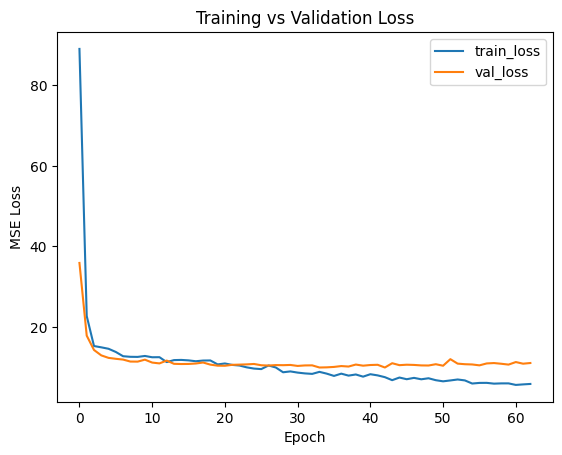

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [28]:
vals = model.evaluate(X_test_p, y_test, verbose=0)
for name, val in zip(model.metrics_names, vals):
    print(f"{name}: {val:.4f}")


loss: 13.8197
compile_metrics: 2.7150


In [29]:
results = model.evaluate(X_test_p, y_test, return_dict=True, verbose=0)
results


{'loss': 13.81973648071289,
 'mean_absolute_error': 2.7150330543518066,
 'root_mean_squared_error': 3.7174906730651855}

In [30]:
for m in model.metrics:
    print(type(m), getattr(m, "name", None))


<class 'keras.src.metrics.reduction_metrics.Mean'> loss
<class 'keras.src.trainers.compile_utils.CompileMetrics'> compile_metrics


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


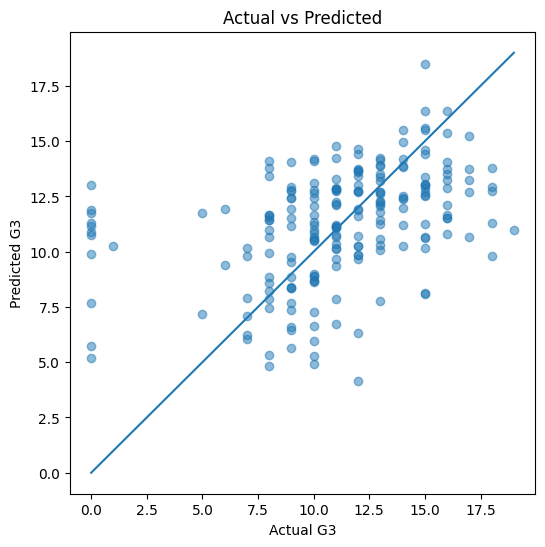

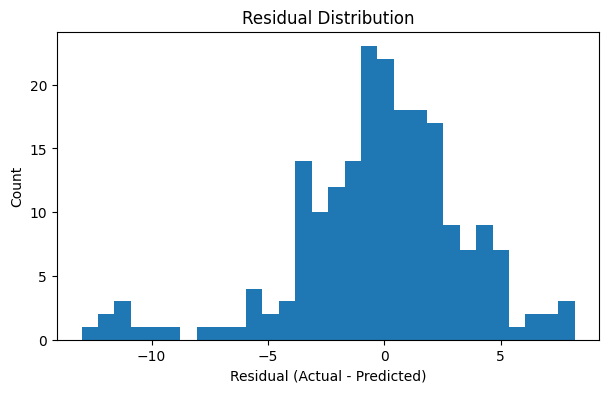

In [31]:

y_pred = model.predict(X_test_p).flatten()
residuals = y_test.to_numpy() - y_pred

# 1) Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
mn, mx = float(min(y_test.min(), y_pred.min())), float(max(y_test.max(), y_pred.max()))
plt.plot([mn, mx], [mn, mx])  # perfect line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted")
plt.show()

# 2) Residuals histogram
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Residual Distribution")
plt.show()

In [33]:
import joblib

model.save("student_grade_ann.keras")  # native Keras format [web:108]
joblib.dump(preprocessor, "preprocessor.joblib")

print("Saved: student_grade_ann.keras + preprocessor.joblib")


Saved: student_grade_ann.keras + preprocessor.joblib


In [34]:
import pandas as pd
import joblib
from tensorflow import keras

loaded_model = keras.models.load_model("student_grade_ann.keras")  # load back [web:108]
loaded_preprocessor = joblib.load("preprocessor.joblib")

def predict_grade(one_row_dict: dict) -> float:
    x = pd.DataFrame([one_row_dict])
    x_p = loaded_preprocessor.transform(x)
    x_p = x_p.toarray() if hasattr(x_p, "toarray") else x_p
    return float(loaded_model.predict(x_p, verbose=0).flatten()[0])


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def eval_reg(y_true, y_pred, name="model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_p, y_train)
lr_pred = lr.predict(X_test_p)
eval_reg(y_test, lr_pred, "LinearRegression")  # ref: linear baseline [web:129]

# Random Forest
rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_p, y_train)
rf_pred = rf.predict(X_test_p)
eval_reg(y_test, rf_pred, "RandomForestRegressor")  # ref: RF regressor [web:128]

# Your ANN
ann_pred = model.predict(X_test_p).flatten()
eval_reg(y_test, ann_pred, "ANN")


LinearRegression -> MAE: 2.6175, RMSE: 3.6916
RandomForestRegressor -> MAE: 2.5213, RMSE: 3.4549
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
ANN -> MAE: 2.7150, RMSE: 3.7175


In [36]:
from tensorflow import keras
from tensorflow.keras import layers

better_model = keras.Sequential([
    layers.Input(shape=(X_train_p.shape[1],)),

    layers.Dense(256),
    layers.BatchNormalization(),   # BN layer [web:133]
    layers.Activation("relu"),
    layers.Dropout(0.30),

    layers.Dense(128),
    layers.BatchNormalization(),   # BN layer [web:133]
    layers.Activation("relu"),
    layers.Dropout(0.25),

    layers.Dense(1, activation="linear")
])

better_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae", keras.metrics.RootMeanSquaredError()]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=25, restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=8, min_lr=1e-5, verbose=1
)  # reduces LR on plateau [web:134]

hist2 = better_model.fit(
    X_train_p, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

better_results = better_model.evaluate(X_test_p, y_test, return_dict=True, verbose=0)
better_results


Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 120.4145 - mae: 10.3678 - root_mean_squared_error: 10.9734 - val_loss: 127.5825 - val_mae: 10.6381 - val_root_mean_squared_error: 11.2952 - learning_rate: 0.0010
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 93.6737 - mae: 9.1565 - root_mean_squared_error: 9.6785 - val_loss: 115.2660 - val_mae: 10.1339 - val_root_mean_squared_error: 10.7362 - learning_rate: 0.0010
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69.8252 - mae: 7.8401 - root_mean_squared_error: 8.3561 - val_loss: 99.2361 - val_mae: 9.4113 - val_root_mean_squared_error: 9.9617 - learning_rate: 0.0010
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.5007 - mae: 6.7008 - root_mean_squared_error: 7.2457 - val_loss: 83.3593 - val_mae: 8.6314 - val_root_mean_squared_error: 9.1301 - learning_rate: 0.0010
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.0489 - mae: 5.6030 - root_mean_squared_error: 6.1684 - val_loss: 69.

{'loss': 12.313824653625488,
 'mae': 2.6252636909484863,
 'root_mean_squared_error': 3.509105920791626}

In [37]:
from sklearn.metrics import r2_score
import numpy as np

y_pred = better_model.predict(X_test_p).flatten()
print("R2:", r2_score(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2: 0.203546404838562


In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def metrics_row(name, y_true, y_hat):
    return {
        "model": name,
        "MAE": mean_absolute_error(y_true, y_hat),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_hat)),
        "R2": r2_score(y_true, y_hat),
    }

rows = []
rows.append(metrics_row("ANN (tuned)", y_test, y_pred))

results_df = pd.DataFrame(rows).sort_values("RMSE")
results_df


,model,MAE,RMSE,R2
0,ANN (tuned),2.625264,3.509106,0.203546


In [39]:
import os, random
import numpy as np
import tensorflow as tf

os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [41]:
feature_cols = X.columns.tolist()
feature_cols


['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'subject']

In [42]:
# Save the tuned/better model
better_model.save("student_grade_ann_best.keras")
print("Saved: student_grade_ann_best.keras")


Saved: student_grade_ann_best.keras


In [43]:
import joblib
joblib.dump(preprocessor, "preprocessor.joblib")
print("Saved: preprocessor.joblib")


Saved: preprocessor.joblib


In [44]:
from tensorflow import keras
import joblib

m = keras.models.load_model("student_grade_ann_best.keras")  # load saved model [web:108]
p = joblib.load("preprocessor.joblib")

# Evaluate again
m.evaluate(X_test_p, y_test, return_dict=True, verbose=0)


{'loss': 12.313824653625488,
 'mae': 2.6252636909484863,
 'root_mean_squared_error': 3.509105920791626}

In [45]:
import json

feature_cols = X.columns.tolist()   # X = df.drop([target, ...]) used in training
with open("feature_columns.json", "w") as f:
    json.dump(feature_cols, f)

print("Saved feature_columns.json with", len(feature_cols), "columns")


Saved feature_columns.json with 31 columns


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# X, y should already be defined like before
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # numeric imputation [web:241]
    ("scaler", StandardScaler()),
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # categorical imputation [web:241]
    ("onehot", OneHotEncoder(handle_unknown="ignore")),    # safe for unseen categories [web:70]
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ]
)

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

X_train_p = X_train_p.toarray() if hasattr(X_train_p, "toarray") else X_train_p
X_test_p = X_test_p.toarray() if hasattr(X_test_p, "toarray") else X_test_p


In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(42)

better_model = keras.Sequential([
    layers.Input(shape=(X_train_p.shape[1],)),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.30),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.25),

    layers.Dense(1, activation="linear")
])

better_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae", keras.metrics.RootMeanSquaredError()]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=25, restore_best_weights=True
)

history = better_model.fit(
    X_train_p, y_train,
    validation_split=0.2,
    epochs=400,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

better_model.evaluate(X_test_p, y_test, return_dict=True)


Epoch 1/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 143.1006 - mae: 11.4057 - root_mean_squared_error: 11.9625 - val_loss: 139.2241 - val_mae: 11.1323 - val_root_mean_squared_error: 11.7993
Epoch 2/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 112.4220 - mae: 10.0841 - root_mean_squared_error: 10.6029 - val_loss: 123.5922 - val_mae: 10.4924 - val_root_mean_squared_error: 11.1172
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.2539 - mae: 8.8983 - root_mean_squared_error: 9.3944 - val_loss: 108.2759 - val_mae: 9.8233 - val_root_mean_squared_error: 10.4056
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68.2982 - mae: 7.7528 - root_mean_squared_error: 8.2643 - val_loss: 92.7187 - val_mae: 9.1055 - val_root_mean_squared_error: 9.6291
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.2907 - mae: 6.6509 - root_mean_squared_error: 7.1618 - val_loss: 78.8594 - val_mae: 8.4021 - val_root_mean_squared_error: 8.8803
Epoch 6/400
21/21 ━━━━━━━━━━━━

{'loss': 14.007979393005371,
 'mae': 2.8041863441467285,
 'root_mean_squared_error': 3.7427234649658203}

In [50]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=8, min_lr=1e-5, verbose=1
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=40, restore_best_weights=True
)

history = better_model.fit(
    X_train_p, y_train,
    validation_split=0.2,
    epochs=800,
    batch_size=32,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)


Epoch 1/800
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0143 - mae: 1.3639 - root_mean_squared_error: 1.7362 - val_loss: 11.6108 - val_mae: 2.7020 - val_root_mean_squared_error: 3.4075 - learning_rate: 0.0010
Epoch 2/800
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0558 - mae: 1.3815 - root_mean_squared_error: 1.7481 - val_loss: 11.9621 - val_mae: 2.7706 - val_root_mean_squared_error: 3.4586 - learning_rate: 0.0010
Epoch 3/800
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8585 - mae: 1.3462 - root_mean_squared_error: 1.6907 - val_loss: 11.9712 - val_mae: 2.7700 - val_root_mean_squared_error: 3.4599 - learning_rate: 0.0010
Epoch 4/800
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9514 - mae: 1.3291 - root_mean_squared_error: 1.7180 - val_loss: 12.5350 - val_mae: 2.8381 - val_root_mean_squared_error: 3.5405 - learning_rate: 0.0010
Epoch 5/800
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1782 - mae: 1.4106 - root_mean_squared_error: 1.7828 - val_loss: 12.4839 - val_mae:

In [51]:
better_model.save("student_grade_ann_best.keras")  # Keras native [web:108]

import joblib
joblib.dump(preprocessor, "preprocessor.joblib")   # sklearn objects


['preprocessor.joblib']

In [52]:
ckpt = keras.callbacks.ModelCheckpoint(
    "student_grade_ann_best.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30,
    restore_best_weights=True
)  # stops when val_loss stops improving [web:10]

history = better_model.fit(
    X_train_p, y_train,
    validation_split=0.2,
    epochs=800,
    batch_size=32,
    callbacks=[ckpt, early_stop],
    verbose=1
)


Epoch 1/800
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1130 - mae: 1.4000 - root_mean_squared_error: 1.7625 
Epoch 1: val_loss improved from None to 10.94759, saving model to student_grade_ann_best.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7941 - mae: 1.3247 - root_mean_squared_error: 1.6715 - val_loss: 10.9476 - val_mae: 2.5891 - val_root_mean_squared_error: 3.3087
Epoch 2/800
15/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6516 - mae: 1.2643 - root_mean_squared_error: 1.6256 
Epoch 2: val_loss did not improve from 10.94759
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7184 - mae: 1.2926 - root_mean_squared_error: 1.6488 - val_loss: 10.9782 - val_mae: 2.5910 - val_root_mean_squared_error: 3.3133
Epoch 3/800
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.6484 - mae: 1.3010 - root_mean_squared_error: 1.6274
Epoch 3: val_loss did not improve from 10.94759
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5935 - mae: 1.2870 - root_mean_squared_error: 1.6104 - val

In [53]:
from tensorflow.keras import regularizers

small_model = keras.Sequential([
    layers.Input(shape=(X_train_p.shape[1],)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.L2(1e-4)),
    layers.Dropout(0.15),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.L2(1e-4)),
    layers.Dropout(0.10),
    layers.Dense(1, activation="linear")
])  # L2 regularization helps control overfitting [web:261]


In [54]:
import joblib
joblib.dump(preprocessor, "preprocessor.joblib")
# model file already saved by ModelCheckpoint above


['preprocessor.joblib']